# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p**
- Handle missing values if any **1p**
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Loading the dataset

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)

# Dataset Dimensions and Basic Overview

#### **Examining Missing Data in Three Columns**
We identified missing values in three categorical columns:  
- **workclass (1836 missing)**
- **occupation (1843 missing)**
- **native-country (583 missing)**  

Before deciding how to handle these missing values, we will:  
1. Check the unique values and their frequencies in these columns.  
2. Visualize the distribution of missing values.  
This will help us determine whether to impute (fill in) or remove the missing data.  


In [3]:
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [4]:
data.shape

(32561, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.describe

<bound method NDFrame.describe of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1    

# Handling Missing Values
We check for missing values and decide on an appropriate strategy for imputation or removal.
In this section, we will:  
- Identify missing values in the dataset.  
- Convert invalid placeholders (e.g., `"?"`) into proper NaN values.  
- Decide on an appropriate strategy to handle missing data (removal or imputation).

In [7]:
# Check missing values
data.isnull().sum()



age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
#Checking for "?" as Missing Values
(data == "?").sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [9]:
#Checking Unique Values in Categorical Columns**  
#Wwe List all unique values for each categorical column to detect inconsistencies or unexpected entries.  

for col in data.select_dtypes(include="object").columns:
    print(f"{col}: {data[col].unique()}")


workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' '

In [10]:
# We replace all "?" values with NaN
data.replace("?", np.nan, inplace=True)

In [11]:
# Count again missing values in each column
data.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

#### **Examining Missing Data in Three Columns**
We identified missing values in three categorical columns:  
- **workclass (1836 missing)**
- **occupation (1843 missing)**
- **native-country (583 missing)**  

Before deciding how to handle these missing values, we will:  
1. Check the unique values and their frequencies in these columns.  
2. Visualize the distribution of missing values.  
This will help us determine whether to impute (fill in) or remove the missing data.  


In [12]:
# Display unique values and their counts in workclass, occupation, and native-country
print("Workclass:\n", data["workclass"].value_counts(), "\n")
print("Occupation:\n", data["occupation"].value_counts(), "\n")
print("Native Country:\n", data["native-country"].value_counts(), "\n")


Workclass:
 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64 

Occupation:
 occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64 

Native Country:
 native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba  

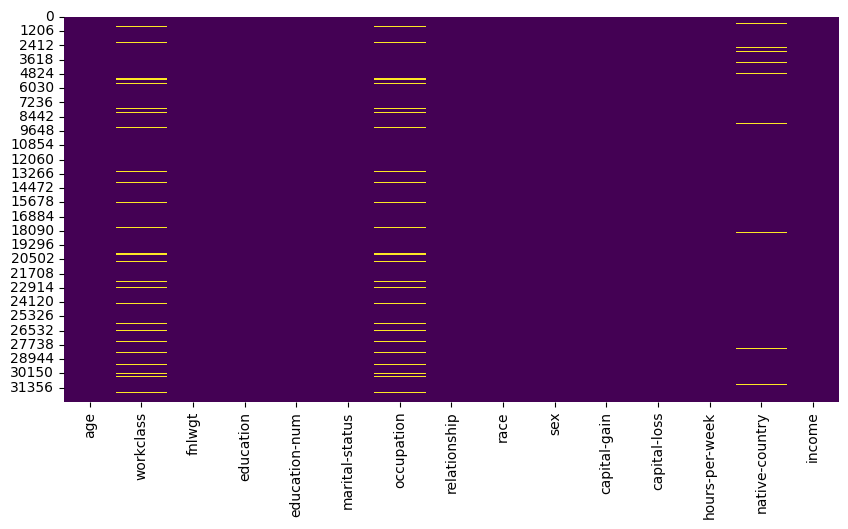

In [13]:
# Creating a heatmap to visualize missing values
# Missing values are highlighted, helping to see patterns in data loss
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False)
plt.show()

In [14]:
# Checking how missing values are distributed in the "workclass" and "occupation" columns
data[["workclass", "occupation"]].isnull().sum(axis=1).value_counts()


0    30718
2     1836
1        7
Name: count, dtype: int64

In [15]:
# Grouping the dataset by "income" and counting missing values in the "workclass" column
data.groupby("income")["workclass"].apply(lambda x: x.isnull().sum())


income
<=50K    1645
>50K      191
Name: workclass, dtype: int64

In [16]:
# Checking dataset size before handling missing values
print(f"Original dataset size: {data.shape[0]}")

# Removing rows where "workclass" or "occupation" have missing values
data_dropped = data.dropna(subset=["workclass", "occupation"])

# Checking dataset size after removing missing values
print(f"New dataset size after dropping missing values: {data_dropped.shape[0]}")


Original dataset size: 32561
New dataset size after dropping missing values: 30718


In [17]:
# Removing rows where "workclass" or "occupation" have missing values
data = data.dropna(subset=["workclass", "occupation"])

In [18]:
# Filling missing values in "native-country" safely
data["native-country"] = data["native-country"].fillna("United-States")



C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\1040526605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["native-country"] = data["native-country"].fillna("United-States")


In [19]:
# Checking if missing values are handled
print(data.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


#### **Handling Missing Values – Decision Summary**
1. **Removing missing `workclass` and `occupation` rows**  
   - These two features are closely related, and missing values could indicate a lack of employment information.  
   - Filling them with the most frequent category could introduce bias and distort the data distribution.  
   - Since the missing data accounted for **~7.3% of the dataset**, removal was a reasonable choice.  

2. **Filling missing `native-country` values**  
   - The most frequent value was `"United-States"`, appearing in the majority of cases.  
   - Imputing with `"United-States"` preserved data consistency while minimizing information loss.  

##### **Outcome:**  
- **All missing values were successfully handled.**

# **Correcting Errors, Inconsistencies & Removing Duplicates**
Before proceeding with encoding and further preprocessing, we need to ensure that the dataset is clean and free of duplicate entries or inconsistent values. This step enhances data quality and prevents unnecessary noise in the model.

### **1. Checking for duplicate rows**  
   - Identifying and removing any exact duplicate records to avoid redundant data.

### **2. Checking for inconsistencies in categorical values**  
   - Listing unique values in categorical columns to detect possible typos, extra spaces, or formatting issues.
   - Standardizing text data by removing leading/trailing spaces and converting to lowercase for uniformity.

### **3. Checking errors and inconsistencies in numerical columns**  
   - Reviewing numerical columns for any negative or unreasonable values (e.g., negative ages, unreasonable capital-gain values).
   - Identifying outliers in numerical columns that might skew the results and need correction or removal.



#### Categorical columns

In [20]:
# Checking for duplicate rows
print(f"Duplicate rows: {data.duplicated().sum()}")

Duplicate rows: 24


In [21]:
# Removing duplicates if any exist
data = data.drop_duplicates()

In [22]:
# Checking unique values in categorical columns to detect typos or inconsistencies
for col in data.select_dtypes(include="object").columns:
    print(f"{col}: {data[col].unique()}")


workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippin

In [23]:
# Fixing known typos
data["native-country"] = data["native-country"].replace("Trinadad&Tobago", "Trinidad&Tobago")
data["native-country"] = data["native-country"].replace("Holand-Netherlands", "Holland-Netherlands")


In [24]:
# Convert everything to lowercase except for 'native-country'
for col in data.select_dtypes(include="object").columns:
    if col != "native-country":  # Skip 'native-country'
        data[col] = data[col].str.strip().str.lower()



In [25]:
# Checking unique values in categorical columns after cleaning
for col in data.select_dtypes(include="object").columns:
    print(f"{col}: {data[col].unique()}")


workclass: ['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov'
 'self-emp-inc' 'without-pay']
education: ['bachelors' 'hs-grad' '11th' 'masters' '9th' 'some-college' 'assoc-acdm'
 'assoc-voc' '7th-8th' 'doctorate' 'prof-school' '5th-6th' '10th'
 'preschool' '12th' '1st-4th']
marital-status: ['never-married' 'married-civ-spouse' 'divorced' 'married-spouse-absent'
 'separated' 'married-af-spouse' 'widowed']
occupation: ['adm-clerical' 'exec-managerial' 'handlers-cleaners' 'prof-specialty'
 'other-service' 'sales' 'craft-repair' 'transport-moving'
 'farming-fishing' 'machine-op-inspct' 'tech-support' 'protective-serv'
 'armed-forces' 'priv-house-serv']
relationship: ['not-in-family' 'husband' 'wife' 'own-child' 'unmarried' 'other-relative']
race: ['white' 'black' 'asian-pac-islander' 'amer-indian-eskimo' 'other']
sex: ['male' 'female']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippin

##### **Categorical Columns: Unique Values Overview**
We have checked the unique values in the categorical columns after the cleaning process. Here are the key findings:

- **Workclass:** Consistent with no discrepancies in category naming. Values like `'state-gov'`, `'private'`, `'self-emp-not-inc'` are all lowercase as expected.
- **Education:** Values like `'bachelors'`, `'masters'`, `'high-school'` are clean and formatted uniformly.
- **Marital-status:** No inconsistencies found in marital categories such as `'married-civ-spouse'`, `'divorced'`, and `'widowed'`.
- **Occupation:** Categorical values like `'exec-managerial'`, `'prof-specialty'`, and `'craft-repair'` are consistent and lowercase.
- **Relationship:** Consistent values such as `'husband'`, `'wife'`, `'own-child'`, `'other-relative'`.
- **Race and Sex:** No discrepancies, with values like `'white'`, `'male'`, `'female'` consistently formatted.
- **Native-country:** The country names are now **in uppercase**, as expected. Example values: `'United-States'`, `'Cuba'`, `'Jamaica'`.
- **Income:** The target variable `'<=50k'`, `'>50k'` is consistent and clean.

These columns are now properly cleaned and formatted, ensuring consistency across the dataset.



#### Numerical columns

In [26]:
# Checking if there are any negative values in numerical columns
for col in data.select_dtypes(include=np.number).columns:
    print(f"{col} has negative values: {any(data[col] < 0)}")


age has negative values: False
fnlwgt has negative values: False
education-num has negative values: False
capital-gain has negative values: False
capital-loss has negative values: False
hours-per-week has negative values: False


In [27]:
# Checking for unusually high values in numerical columns
for col in data.select_dtypes(include=np.number).columns:
    print(f"Max value in {col}: {data[col].max()}")


Max value in age: 90
Max value in fnlwgt: 1484705
Max value in education-num: 16
Max value in capital-gain: 99999
Max value in capital-loss: 4356
Max value in hours-per-week: 99


##### **Numerical Columns: Values Overview**
We have checked for any **negative values** and **unreasonably high values** in the numerical columns. Here are the key findings:

- **Negative values:** No negative values were found in any of the numerical columns.
- **High values:**
  - **Age:** Maximum value is **90**, which is reasonable.
  - **Fnlwgt:** Maximum value is **1,484,705**, which could be considered high but may still be valid.
  - **Education-num:** Maximum value is **16**, which is within the expected range.
  - **Capital-gain:** Maximum value is **99,999**, which is high but plausible.
  - **Capital-loss:** Maximum value is **4,356**, which is reasonable.
  - **Hours-per-week:** Maximum value is **99**, which is unusual.

These values are consistent and reasonable for now, but we will come back to check for **outliers** in these columns during the next phases of preprocessing.


# Encoding Categorical Data
**Encoding** the categorical columns will be the next step before addressing outliers. 

We will use One-Hot Encoding for nominal variables and  Ordinal Encoding for the education column, which has a natural order.



In [28]:
# One-Hot Encoding for nominal columns
data = pd.get_dummies(data, columns=["workclass", "occupation", "sex", "native-country", "marital-status", "relationship", "race"], drop_first=True)


In [29]:
# Ordinal Encoding for 'education'
education_order = ['1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                   'hs-grad', 'some-college', 'assoc-acdm', 'assoc-voc', 
                   'bachelors', 'masters', 'doctorate', 'prof-school', 'preschool']

# Apply the ordinal encoding based on the new order
data['education'] = data['education'].apply(lambda x: education_order.index(x))


In [30]:
# Binary encoding for 'income' (treating it as a feature)
data['income'] = data['income'].map({'<=50k': 0, '>50k': 1})


In [31]:
# CHecking the shape of the data after encoding
print(f"Shape of the data after encoding: {data.shape}")


Shape of the data after encoding: (30694, 83)


In [32]:
# Checking the first few rows of the data after encoding
print(data.head())


   age  fnlwgt  education  education-num  capital-gain  capital-loss  \
0   39   77516         11             13          2174             0   
1   50   83311         11             13             0             0   
2   38  215646          7              9             0             0   
3   53  234721          5              7             0             0   
4   28  338409         11             13             0             0   

   hours-per-week  income  workclass_local-gov  workclass_private  ...  \
0              40       0                False              False  ...   
1              13       0                False              False  ...   
2              40       0                False               True  ...   
3              40       0                False               True  ...   
4              40       0                False               True  ...   

   marital-status_widowed  relationship_not-in-family  \
0                   False                        True   
1       

In [33]:
# Checking unique values in 'education' after encoding and other columns
print(f"Unique values in 'education': {data['education'].unique()}")
print(f"Columns after encoding: {data.columns}")


Unique values in 'education': [11  7  5 12  3  8  9 10  2 13 14  1  4 15  6  0]
Columns after encoding: Index(['age', 'fnlwgt', 'education', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'workclass_local-gov',
       'workclass_private', 'workclass_self-emp-inc',
       'workclass_self-emp-not-inc', 'workclass_state-gov',
       'workclass_without-pay', 'occupation_armed-forces',
       'occupation_craft-repair', 'occupation_exec-managerial',
       'occupation_farming-fishing', 'occupation_handlers-cleaners',
       'occupation_machine-op-inspct', 'occupation_other-service',
       'occupation_priv-house-serv', 'occupation_prof-specialty',
       'occupation_protective-serv', 'occupation_sales',
       'occupation_tech-support', 'occupation_transport-moving', 'sex_male',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Cuba',
       'native-country_Dominican-Republic', 'native-country_Ecuado

In [34]:
# Checking if there are any missing values in the data after encoding
print(f"Missing values in the data: \n{data.isnull().sum()}")

Missing values in the data: 
age                        0
fnlwgt                     0
education                  0
education-num              0
capital-gain               0
                          ..
relationship_wife          0
race_asian-pac-islander    0
race_black                 0
race_other                 0
race_white                 0
Length: 83, dtype: int64


# Outlier detection

C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\2506351058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="viridis")


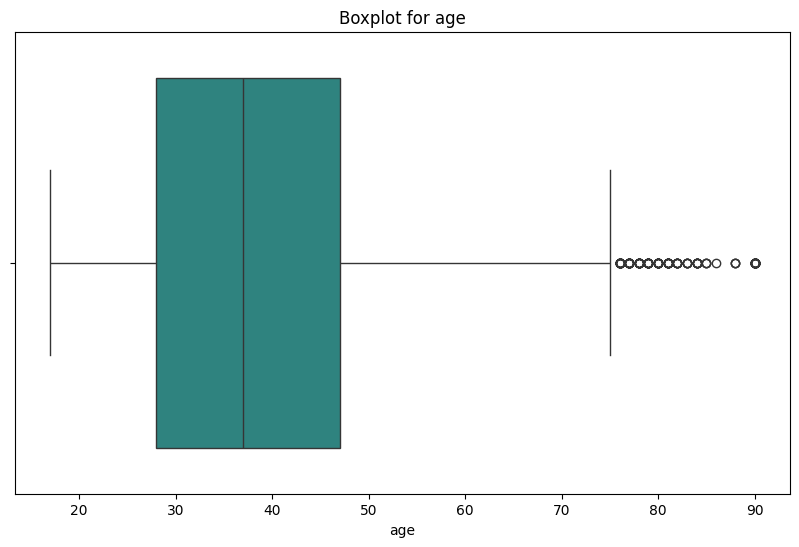

C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\2506351058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="viridis")


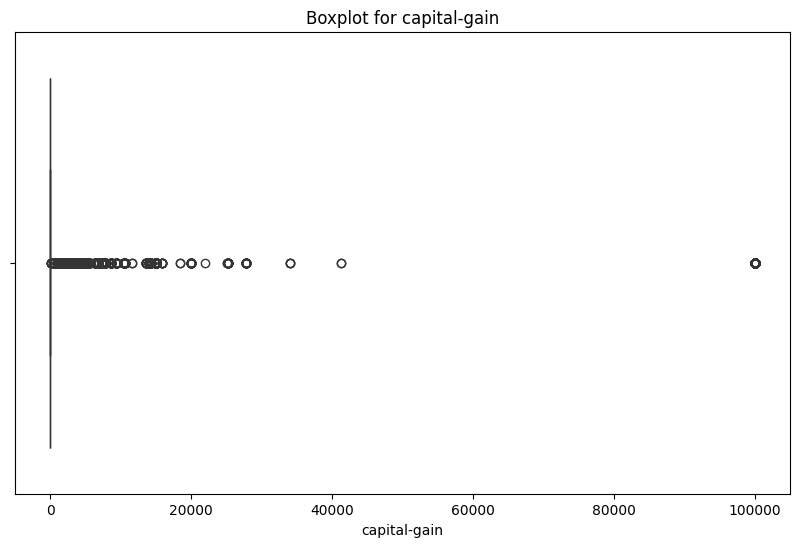

C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\2506351058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="viridis")


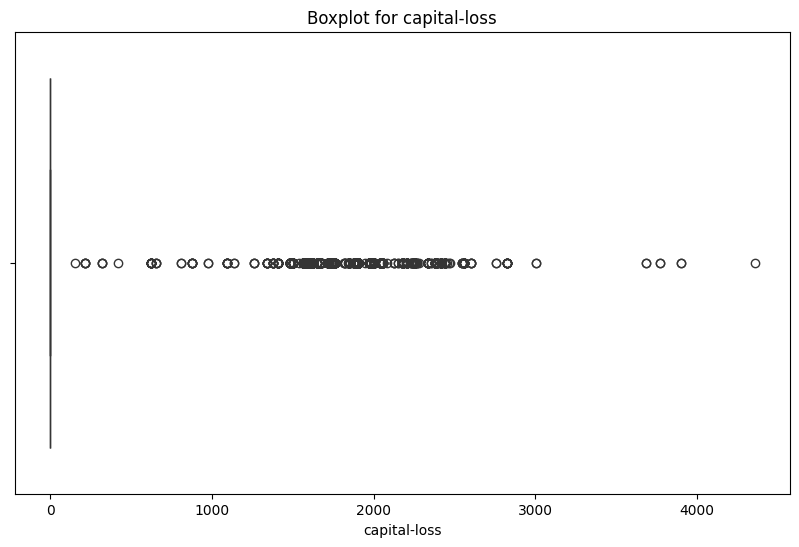

C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\2506351058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="viridis")


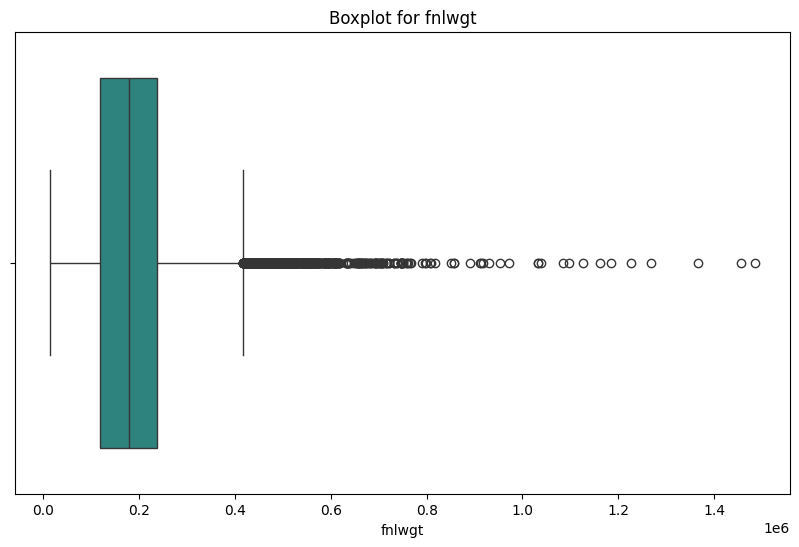

C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\2506351058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="viridis")


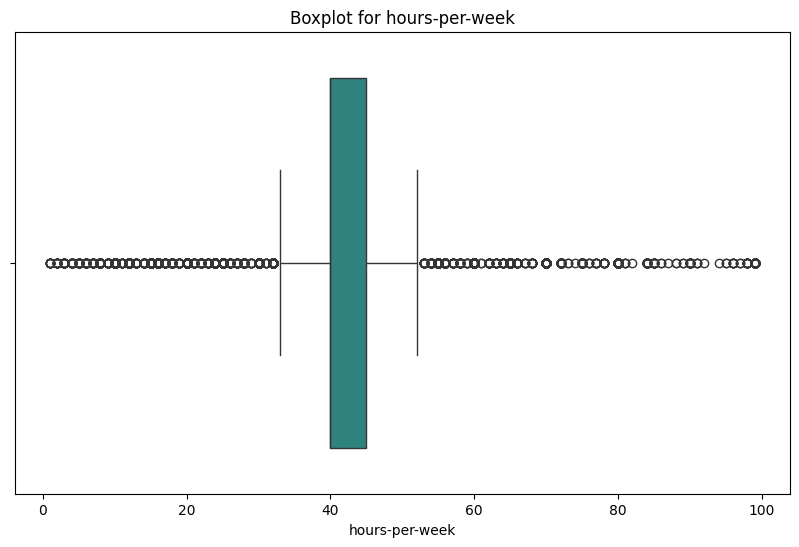

In [35]:
# Visualizing numerical columns with boxplots
numerical_cols = data.select_dtypes(include=np.number).columns.difference(['income','education', 'education-num'])

# Plotting boxplots for numerical columns excluding 'income'
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col], palette="viridis")
    plt.title(f"Boxplot for {col}")
    plt.show()

In [36]:
# Select only numerical columns, excluding 'income'
numerical_cols = data.select_dtypes(include=np.number).columns.difference(['income','education', 'education-num'])

# Identifying outliers using IQR method for numerical columns only
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Detecting outliers for each numerical column
outliers = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR)))
outliers_sum = outliers.sum()
print("Outliers detected in each numerical column:")
print(outliers_sum)



Outliers detected in each numerical column:
age                171
capital-gain      2589
capital-loss      1461
fnlwgt             926
hours-per-week    8096
dtype: int64


In [37]:
# Remove outliers based on the IQR method
data_no_outliers = data[~outliers.any(axis=1)]

# Check the shape of the data before and after removing outliers
print(f"Original dataset size: {data.shape[0]}")
print(f"New dataset size after removing outliers: {data_no_outliers.shape[0]}")


Original dataset size: 30694
New dataset size after removing outliers: 18889


In [38]:
data_no_outliers_temporary = data_no_outliers.drop(columns=["income",'education', 'education-num'])

In [39]:
data_no_outliers_temporary.describe()

age         fnlwgt  capital-gain  capital-loss  hours-per-week
count  18889.000000   18889.000000       18889.0       18889.0    18889.000000
mean      38.261528  181386.845148           0.0           0.0       41.490232
std       11.820955   87203.831238           0.0           0.0        3.956297
min       17.000000   14878.000000           0.0           0.0       33.000000
25%       29.000000  117605.000000           0.0           0.0       40.000000
50%       37.000000  177331.000000           0.0           0.0       40.000000
75%       47.000000  230475.000000           0.0           0.0       41.000000
max       75.000000  416415.000000           0.0           0.0       52.000000

#### Outlier outcomes
In this phase, we applied the IQR method to detect and remove outliers from the numerical columns, specifically excluding `'education'`, `'education-num'` (both categorical ordinal variables), `'income'` (binary variable). We opted for an aggressive approach to outlier removal because linear models, such as Linear Regression, are highly sensitive to extreme values, which can disproportionately influence model predictions. Given the large size of the dataset, we concluded that removing these outliers would not lead to significant data loss, but would instead improve the model's robustness and help prevent distorted results.

# Feature Engineering

In [40]:
# Binning 'age' into categories: 'young', 'middle_aged', 'senior'
bins = [0, 25, 45, 65, 100]
labels = ['young', 'middle_aged', 'senior', 'elderly']
data_no_outliers['age_binned'] = pd.cut(data_no_outliers['age'], bins=bins, labels=labels, right=False)

# Check the new feature
print(data_no_outliers[['age', 'age_binned']].head())


   age   age_binned
2   38  middle_aged
3   53       senior
4   28  middle_aged
5   37  middle_aged
7   52       senior


C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\3076595374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['age_binned'] = pd.cut(data_no_outliers['age'], bins=bins, labels=labels, right=False)


In [41]:
# Create an interaction feature between 'age' and 'education-num'
data_no_outliers['age_education_interaction'] = data_no_outliers['age'] * data_no_outliers['education-num']

# Check the new feature
print(data_no_outliers[['age', 'education-num', 'age_education_interaction']].head())


   age  education-num  age_education_interaction
2   38              9                        342
3   53              7                        371
4   28             13                        364
5   37             14                        518
7   52              9                        468


C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\2910290614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['age_education_interaction'] = data_no_outliers['age'] * data_no_outliers['education-num']


In [42]:
# List of one-hot encoded columns for 'workclass' (or any other categorical feature)
workclass_columns = [col for col in data_no_outliers.columns if 'workclass' in col]

# Frequency encoding for 'workclass' (one-hot encoded columns)
workclass_freq = data_no_outliers[workclass_columns].sum() / len(data_no_outliers)
data_no_outliers['workclass_encoded'] = data_no_outliers[workclass_columns].idxmax(axis=1).map(workclass_freq)

# Check the new feature
print(data_no_outliers[['workclass_encoded']].head(15))


    workclass_encoded
2            0.761184
3            0.761184
4            0.761184
5            0.761184
7            0.061041
11           0.044364
13           0.761184
14           0.761184
15           0.761184
16           0.061041
17           0.761184
18           0.761184
19           0.061041
22           0.072053
24           0.761184


C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\3242678456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['workclass_encoded'] = data_no_outliers[workclass_columns].idxmax(axis=1).map(workclass_freq)


In [43]:
# List of one-hot encoded columns for 'occupation'
occupation_columns = [col for col in data_no_outliers.columns if 'occupation' in col]

# Frequency encoding for 'occupation' (one-hot encoded columns)
occupation_freq = data_no_outliers[occupation_columns].sum() / len(data_no_outliers)
data_no_outliers['occupation_encoded'] = data_no_outliers[occupation_columns].idxmax(axis=1).map(occupation_freq)

# Check the new feature
print(data_no_outliers[['occupation_encoded']].head())


   occupation_encoded
2            0.046747
3            0.046747
4            0.124411
5            0.126052
7            0.126052


C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\3405804089.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['occupation_encoded'] = data_no_outliers[occupation_columns].idxmax(axis=1).map(occupation_freq)


In [44]:
# List of one-hot encoded country columns 
country_columns = [col for col in data_no_outliers.columns if 'native-country' in col]

# Mapping of countries to continents
country_to_continent = {
    'United-States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Columbia': 'South America',
    'Cuba': 'North America',
    'Dominican-Republic': 'North America',
    'Ecuador': 'South America',
    'El-Salvador': 'North America',
    'England': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Haiti': 'North America',
    'Holland-Netherlands': 'Europe',
    'Honduras': 'North America',
    'Hong': 'Asia',
    'Hungary': 'Europe',
    'India': 'Asia',
    'Iran': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Laos': 'Asia',
    'Nicaragua': 'North America',
    'Outlying-US(Guam-USVI-etc)': 'Oceania',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto-Rico': 'North America',
    'Scotland': 'Europe',
    'South': 'Europe',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'Trinidad&Tobago': 'North America',
    'Vietnam': 'Asia',
    'Yugoslavia': 'Europe',
    'China': 'Asia'
}

# Create a new 'continent' feature by checking which country columns are 1
data_no_outliers['continent'] = data_no_outliers[country_columns].idxmax(axis=1).str.replace('native-country_', '').map(country_to_continent)

# Check the new feature
print(data_no_outliers[['continent']].head(15))


        continent
2   North America
3   North America
4   North America
5   North America
7   North America
11           Asia
13  North America
14  North America
15  North America
16  North America
17  North America
18  North America
19  North America
22  North America
24  North America


C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\1452644215.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['continent'] = data_no_outliers[country_columns].idxmax(axis=1).str.replace('native-country_', '').map(country_to_continent)


In [45]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'age_binned' (ordinal categories)
label_encoder = LabelEncoder()
data_no_outliers['age_binned'] = label_encoder.fit_transform(data_no_outliers['age_binned'])

# Check the new feature
print(data_no_outliers[['age_binned']].head())


C:\Users\Laura\AppData\Local\Temp\ipykernel_26640\3131065601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['age_binned'] = label_encoder.fit_transform(data_no_outliers['age_binned'])


   age_binned
2           1
3           2
4           1
5           1
7           2


In [46]:
# One-Hot Encoding for 'continent'
data_no_outliers = pd.get_dummies(data_no_outliers, columns=['continent'], drop_first=True)

# Check the new columns
print(data_no_outliers.filter(regex='continent').head())  # Filter for all continent-related columns


   continent_Europe  continent_North America  continent_Oceania  \
2             False                     True              False   
3             False                     True              False   
4             False                     True              False   
5             False                     True              False   
7             False                     True              False   

   continent_South America  
2                    False  
3                    False  
4                    False  
5                    False  
7                    False  


 # Normalization and Scaling

In [47]:
data_no_outliers.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'workclass_local-gov',
       'workclass_private', 'workclass_self-emp-inc',
       'workclass_self-emp-not-inc', 'workclass_state-gov',
       'workclass_without-pay', 'occupation_armed-forces',
       'occupation_craft-repair', 'occupation_exec-managerial',
       'occupation_farming-fishing', 'occupation_handlers-cleaners',
       'occupation_machine-op-inspct', 'occupation_other-service',
       'occupation_priv-house-serv', 'occupation_prof-specialty',
       'occupation_protective-serv', 'occupation_sales',
       'occupation_tech-support', 'occupation_transport-moving', 'sex_male',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Cuba',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_France', 'nati

In [48]:
data_no_outliers.describe()

age         fnlwgt     education  education-num  capital-gain  \
count  18889.000000   18889.000000  18889.000000   18889.000000       18889.0   
mean      38.261528  181386.845148      8.068453      10.032823           0.0   
std       11.820955   87203.831238      2.477968       2.474389           0.0   
min       17.000000   14878.000000      0.000000       1.000000           0.0   
25%       29.000000  117605.000000      7.000000       9.000000           0.0   
50%       37.000000  177331.000000      8.000000      10.000000           0.0   
75%       47.000000  230475.000000     10.000000      12.000000           0.0   
max       75.000000  416415.000000     15.000000      16.000000           0.0   

       capital-loss  hours-per-week        income    age_binned  \
count       18889.0    18889.000000  18889.000000  18889.000000   
mean            0.0       41.490232      0.210758      1.531738   
std             0.0        3.956297      0.407857      0.729122   
min             0.0       33.000000      0.000000      0.000000   
25%             0.0       40.000000      0.000000      1.000000   
50%             0.0       40.000000      0.000000      1.000000   
75%             0.0       41.000000      0.000000      2.000000   
max             0.0       52.000000      1.000000      3.000000   

       age_education_interaction  workclass_encoded  occupation_encoded  
count               18889.000000       18889.000000        18889.000000  
mean                  383.758696           0.593501            0.088145  
std                   154.961938           0.299468            0.051064  
min                    19.000000           0.000159            0.000318  
25%                   270.000000           0.761184            0.046747  
50%                   364.000000           0.761184            0.101699  
75%                   480.000000           0.761184            0.126052  
max                  1125.000000           0.761184            0.155699

In [49]:
data_no_outliers.drop(columns=['capital-gain', 'capital-loss'], inplace=True)

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = ['age', 'fnlwgt', 'age_education_interaction']

# Apply normalization
scaler = MinMaxScaler()
data_no_outliers[numerical_cols] = scaler.fit_transform(data_no_outliers[numerical_cols])

In [51]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['age', 'fnlwgt','age_education_interaction']

# Apply standardization
scaler = StandardScaler()
data_no_outliers[numerical_cols] = scaler.fit_transform(data_no_outliers[numerical_cols])

In [52]:
data_no_outliers.describe()

age        fnlwgt     education  education-num  \
count  1.888900e+04  1.888900e+04  18889.000000   18889.000000   
mean   1.254519e-16 -2.170486e-16      8.068453      10.032823   
std    1.000026e+00  1.000026e+00      2.477968       2.474389   
min   -1.798678e+00 -1.909472e+00      0.000000       1.000000   
25%   -7.835047e-01 -7.314304e-01      7.000000       9.000000   
50%   -1.067225e-01 -4.651117e-02      8.000000      10.000000   
75%    7.392553e-01  5.629277e-01     10.000000      12.000000   
max    3.107993e+00  2.695230e+00     15.000000      16.000000   

       hours-per-week        income    age_binned  age_education_interaction  \
count    18889.000000  18889.000000  18889.000000               1.888900e+04   
mean        41.490232      0.210758      1.531738               1.623163e-16   
std          3.956297      0.407857      0.729122               1.000026e+00   
min         33.000000      0.000000      0.000000              -2.353922e+00   
25%         40.000000      0.000000      1.000000              -7.341268e-01   
50%         40.000000      0.000000      1.000000              -1.275101e-01   
75%         41.000000      0.000000      2.000000               6.210806e-01   
max         52.000000      1.000000      3.000000               4.783503e+00   

       workclass_encoded  occupation_encoded  
count       18889.000000        18889.000000  
mean            0.593501            0.088145  
std             0.299468            0.051064  
min             0.000159            0.000318  
25%             0.761184            0.046747  
50%             0.761184            0.101699  
75%             0.761184            0.126052  
max             0.761184            0.155699

# Train-Test Split

In [53]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_no_outliers.drop(columns=['hours-per-week'])  # Features (all columns except the target)
y = data_no_outliers['hours-per-week']  # Target variable

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (15111, 88)
Testing features shape: (3778, 88)
Training target shape: (15111,)
Testing target shape: (3778,)


In [55]:
# Save training and testing data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [56]:
data_no_outliers.to_csv('preprocessed_data.csv', index=False)